In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec

from konlpy.tag import Okt
from konlpy.tag import Mecab
from khaiii import KhaiiiApi

import numpy as np
from collections import Counter
import re
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN,KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from wordcloud import WordCloud

In [116]:
# 재해개요 Data Load
df = pd.read_excel("fire_data.xlsx")
df


,연번,기준연월,발생형태_소,재해개요
0,43,201212,화재,주조사업장내 가우징 작업장에서 롤초크 안쪽에 붙어있는 소착을 제거하기 위해서 가우징...
1,120,201212,폭발·파열,[비보고 사유] 가스주입실에서 이송대기중 질소가스통 체결부위 불량으로 폭발되면서 파...
2,197,201212,폭발·파열,[비보고 사유] 재해 발생시 산업재해발생 보고를 해야 한다는 사실을 알지 못함 [조...
3,394,201212,폭발·파열,[비보고 사유] 재해자가 본인 실수로 다쳤으므로 본인이 알아서 한다고 하여 방치한 ...
4,478,201212,폭발·파열,[비보고 사유] 공상처리 [조사자 견해] 유성기업(주)에서 제출한 공상처리 내역 및...
...,...,...,...,...
1814,495010,201712,화재,상기일 상기인 호스를 연결하기 위해 녹이는 과정에서 사고가 발생.(신나에 불이 옮겨...
1815,495567,201712,화재,12월 07일 오전07시경 제품(무거리) 보관용기로 사용하기 위해 폐드럼통 뚜껑 산...
1816,495930,201712,폭발·파열,2017년 12월 12일 14시 48분경 회사 공장동에서 기계시운전을 하면서 온도상...
1817,496127,201712,화재,2017년 12월 18일 13시경 부산시 강서구 송정동 소재 부광화학공업(주) 본공...


In [42]:
# 불용어 정의
df_stopwords = pd.read_excel('stopwords.xlsx')
df_stopwords

,불용어
0,아
1,휴
2,아이구
3,아이쿠
4,아이고
...,...
831,2017
832,21
833,22
834,25


In [80]:
# 카카오에서 개발한 형태소 분석기 KhaiiiApi
api = KhaiiiApi()
sentence_list = []
morphs_list = []
df = pd.read_excel("fire_data.xlsx")
df_stopwords = pd.read_excel('stopwords.xlsx')
stopwords = list(df_stopwords['불용어'])


for sentence in df["재해개요"]:
    if sentence != '':
        # 모든 문장
        if '.' in sentence:
            sentence_detail = sentence.split('. ')
            for i in sentence_detail:
                if i != '':
                    sentence_list.append(i)
        else:
            sentence_list.append(sentence)

            
            
# for s in sentence_list:
#     print(s)
#     print()
# print(sentence_list[0])
len(sentence_list)

2561

In [83]:
morphs_list = []
sentence_nouns_list = []

api = KhaiiiApi()

# 모든 문장에서 명사만 추출
for sentence in df.get("재해개요"):
    morphs_value = []
    for word in api.analyze(sentence):
        for morph in word.morphs:
            if morph.tag == 'NNG' and morph.lex not in stopwords: # 명사 추출, 불용어 제거
                morphs_list.append(morph.lex)
                morphs_value.append(morph.lex)
    sentence_nouns_list.append(morphs_value) # 각 문장별 명사 리스트 구별

morphs_list # 행 구분 없이 전체 단어 리스트 
sentence_nouns_list # 행 구분한 전체 단어 리스트 


1819

In [84]:
nouns_counter = Counter(morphs_list)
top_nouns = dict(nouns_counter.most_common(300))
top_nouns

{'작업': 1533,
 '화상': 1069,
 '발생': 1006,
 '불': 763,
 '폭발': 683,
 '화재': 651,
 '사고': 369,
 '재해자': 328,
 '공장': 324,
 '용접': 293,
 '주': 283,
 '과정': 260,
 '가스': 258,
 '얼굴': 255,
 '소재': 254,
 '내부': 227,
 '재해': 226,
 '병원': 219,
 '산소': 215,
 '절단': 212,
 '현장': 209,
 '치료': 178,
 '불꽃': 169,
 '기계': 162,
 '입음': 159,
 '옷': 158,
 '드럼통': 157,
 '사용': 149,
 '확인': 144,
 '탱크': 129,
 '층': 128,
 '생산': 127,
 '옆': 126,
 '절단기': 125,
 '원인': 125,
 '제거': 123,
 '부위': 121,
 '사망': 121,
 '회사': 118,
 '동료': 117,
 '본인': 115,
 '화염': 113,
 '부분': 113,
 '제품': 112,
 '이송': 107,
 '상태': 106,
 '용기': 104,
 '호스': 98,
 '상기': 97,
 '차량': 96,
 '바닥': 95,
 '근로자': 95,
 '손': 95,
 '진압': 92,
 '작업복': 90,
 '공정': 88,
 '연결': 87,
 '이용': 86,
 '스파': 86,
 '안': 85,
 '후송': 85,
 '유증기': 84,
 '이동': 82,
 '다리': 82,
 '투입': 82,
 '통': 82,
 '동': 81,
 '응급': 81,
 '직원': 80,
 '가열': 79,
 '입원': 77,
 '소리': 77,
 '전기': 75,
 '추정': 75,
 '소화기': 75,
 '청소': 75,
 '준비': 73,
 '발화': 73,
 '몸': 73,
 '수리': 73,
 '진화': 72,
 '세척': 72,
 '압력': 71,
 '당사': 69,
 '근무': 69,
 '바지': 69,
 '점화': 

# CountVectorizer 기반 인접행렬 만들기

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
countv = CountVectorizer(stop_words = list(df_stopwords.get("불용어")),
                         min_df = 9 # 최소 단어 등장 횟수
                        )
sp_mat = countv.fit_transform(df["재해개요"])
# 희소행렬을 np array로
count_df = pd.DataFrame(sp_mat.toarray(),columns = countv.get_feature_names())
count_df

,01월,02월,03월,04월,05월,06일,07월,08월,09,09시,...,회사에,회사에서,회수하는,후송,후송되어,후송됨,후송하여,후송함,휴식을,흡입하여
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# 단어: 정수인덱스로 구성된 딕셔너리
countv.vocabulary_

{'작업장에서': 591,
 '제거하기': 640,
 '작업하던': 595,
 '불똥이': 332,
 '불이': 337,
 '붙은': 345,
 '입음': 564,
 '비보고': 349,
 '사유': 375,
 '파편에': 711,
 '부상을': 321,
 '입고': 553,
 '병원': 299,
 '치료를': 686,
 '하여': 742,
 '조사자': 647,
 '견해': 121,
 '사고가': 354,
 '않은': 455,
 '합니다': 749,
 '작업장소': 590,
 '작업목적': 580,
 '작업도구': 578,
 '작업내용': 577,
 '재해사유': 607,
 '재해발생': 606,
 '파편이': 712,
 '재해': 603,
 '상기': 389,
 '내에서': 175,
 '불을': 336,
 '사용하여': 373,
 '부주의로': 325,
 '락카통이': 239,
 '폭발하여': 728,
 '얼굴에': 466,
 '화상을': 767,
 '재해자가': 610,
 '본인': 307,
 '본인이': 311,
 '것으로': 119,
 '없는': 468,
 '작업장내에서': 589,
 '위해': 517,
 '락카가': 238,
 '폭발하면서': 727,
 '목에': 250,
 '확인': 782,
 '결과': 122,
 '내에': 174,
 '이를': 531,
 '전기로': 614,
 '페인트': 717,
 '터져': 695,
 '회사에서': 788,
 '사업장내': 366,
 '현장에서': 758,
 '토치를': 700,
 '사용': 370,
 '붙어': 339,
 '사이에': 376,
 '발생한': 286,
 '업무를': 467,
 '하지': 747,
 '재해자의': 612,
 '재해자': 609,
 '등에': 226,
 '2011': 46,
 '19': 38,
 '소재': 412,
 '가스': 102,
 '빠지면서': 352,
 '붙어서': 340,
 '17': 34,
 '16': 32,
 '30분': 73,
 '작업': 576,
 '것을': 12

In [117]:
# count Vector 기반 동시 단어 행렬
count_df_transpose = count_df.transpose()
count_df_transpose # 전치 행렬
count_term_document_matrix = count_df_transpose.dot(count_df) # 행렬 * 전치행렬
count_term_document_matrix # 동시 단어 행렬

,01월,02월,03월,04월,05월,06일,07월,08월,09,09시,...,회사에,회사에서,회수하는,후송,후송되어,후송됨,후송하여,후송함,휴식을,흡입하여
01월,12,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
02월,0,10,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
03월,0,0,17,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
04월,0,0,0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
05월,0,0,0,0,17,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
후송됨,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,10,0,0,0,0
후송하여,0,0,0,0,1,0,1,0,0,0,...,0,2,0,0,2,0,15,0,0,0
후송함,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,3,3
휴식을,0,0,0,0,0,0,0,0,2,0,...,0,0,0,1,0,0,0,3,9,4


In [ ]:
# 여기에 위에 동시행렬 으로 그래프 그리면됨 


# CountVectorizer 기반 Clustering, Wordcloud

In [88]:
tsne = TSNE(random_state=0,
             learning_rate = 50,
             n_components = 2)
tsne_features = tsne.fit_transform(count_df)

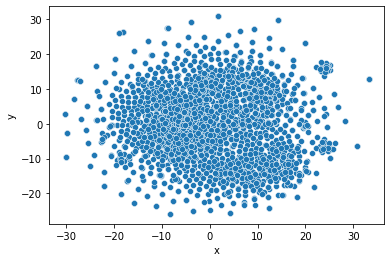

In [89]:
df_tsne = pd.DataFrame()
df_tsne['x'] = tsne_features[:,0]
df_tsne['y'] = tsne_features[:,1]
sns.scatterplot(x="x",y="y",data = df_tsne)
plt.show()

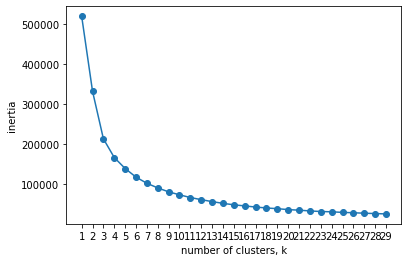

In [90]:
ks = range(1,30)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(tsne_features)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


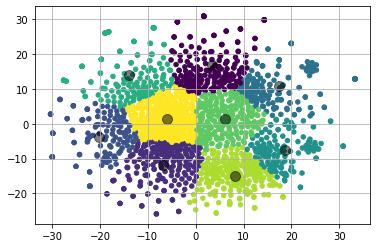

In [91]:
n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

# 모델에 fitting 하기
kmeans.fit(tsne_features)

y_kmeans = kmeans.predict(tsne_features)
y_kmeans[0:10] # 군집화 된 결과

plt.scatter(np.array(tsne_features)[:,0], np.array(tsne_features)[:,1], c=y_kmeans, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.show()


In [92]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

clustered_dic = {}
clustered_list = []
cluster_num = len(set(y_kmeans))
k_means_cluster_label = {}
for idx,i in enumerate(y_kmeans):
    if i not in clustered_dic:
        clustered_dic[i] = [df['재해개요'].iloc[idx]]
    else:
        clustered_dic[i].append(df['재해개요'].iloc[idx])
    if i not in k_means_cluster_label:
        k_means_cluster_label[i] = [df["연번"].iloc[idx]]
    else:
        k_means_cluster_label[i].append(df["연번"].iloc[idx])
clustered_dic

k_means_cluster_label_list = []
for i in k_means_cluster_label.items():
    k_means_cluster_label_list.append(i[1])


# 클러스터링이 된 패키지들
# 20개의 군집으로 생성
clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])
clustered_dic
df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
cluster_num = [len(i) for i in df_cluster['clusters']]
df_cluster['cluster_num'] = cluster_num
df_cluster['cluster_label'] = k_means_cluster_label_list
df_cluster

,num,clusters,cluster_num,cluster_label
0,0,[2011. 11. 16. 15:35경 망 임진섭은 (주)한국테르밋 공장내에서 용접...,209,"[43, 7407, 7567, 7933, 9084, 10655, 10759, 115..."
1,1,[2011.12.1 8시50분경 일을 시작하고 몇분이 지나 갑자기 웅성거리는 사람들...,205,"[120, 197, 394, 478, 636, 672, 963, 1388, 1525..."
2,2,[2011년 12월 23일 오전 08시30분경 현장에서 드럼통 뚜껑을 보안경을 쓰고...,144,"[1973, 2545, 3420, 3588, 5922, 5927, 6352, 691..."
3,3,[[비보고 사유] 가스주입실에서 이송대기중 질소가스통 체결부위 불량으로 폭발되면서 ...,177,"[3112, 8391, 11171, 11401, 14714, 16036, 16156..."
4,4,[서울 화곡동 거래처에서 재활용폐지를 실고 회사로 가던 중 오정동 오정대로에서 원인...,150,"[3294, 7286, 8273, 9595, 11409, 14151, 16705, ..."
5,5,[2011년 11월 28일 8시 40분경 근로자가 작업 도중 나일론 원재료 퍼지 작...,152,"[4276, 5940, 17615, 19947, 27178, 27866, 32088..."
6,6,[2011.10.16. 15시경 공장내에서 화재로 인하여 얼굴에 화상을 입는 재해를...,224,"[4892, 7306, 7499, 8017, 8328, 8527, 11147, 13..."
7,7,[주조사업장내 가우징 작업장에서 롤초크 안쪽에 붙어있는 소착을 제거하기 위해서 가우...,219,"[5113, 8806, 12264, 14448, 18755, 22367, 24220..."
8,8,"[숙소(컨테이너)에서 발생한 화재(경찰조사결과, 담뱃불에 의한 화재로 추정)로 인하...",339,"[8230, 9138, 9912, 13071, 21729, 27316, 29429,..."


{'불': 331, '작업': 225, '화상': 131, '발생': 82, '옷': 77, '용접': 63, '재해자': 51, '사고': 41, '공장': 41, '과정': 38, '작업복': 36, '주': 36, '병원': 35, '화재': 35, '산소': 35, '절단': 33, '현장': 30, '동료': 27, '소재': 27, '옆': 25, '절단기': 24, '손': 24, '장갑': 23, '제거': 22, '치료': 22, '내부': 22, '가스': 22, '폭발': 21, '바지': 21, '제품': 20, '신나': 20, '불꽃': 19, '소화기': 18, '이송': 18, '재해': 18, '부위': 18, '기계': 17, '사용': 17, '상기': 17, '몸': 17, '얼굴': 17, '진화': 16, '도형제': 16, '진압': 16, '다리': 15, '부분': 15, '응급': 14, '세척': 14, '회사': 14, '연결': 14, '재해임': 14, '근로자': 14, '알코올': 14, '스파': 13, '신': 13, '사망': 13, '본인': 13, '호스': 12, '바닥': 12, '불길': 12, '알콜': 12, '이용': 11, '동': 11, '주입': 11, '청소': 11, '오른쪽': 11, '사상': 11, '페인트': 11, '소리': 11, '확인': 11, '조치': 10, '차량': 10, '통': 10, '건조': 10, '사원': 10, '보루': 10, '불똥': 9, '가슴': 9, '입원': 9, '도장': 9, '연료': 9, '상태': 9, '층': 9, '도포': 9, '준비': 9, '물': 9, '근무': 9, '주변': 9, '밖': 9, '난로': 9, '소속': 8, '나통': 8, '당사': 8, '도형': 8, '발화': 8, '산소호스': 8, '병': 8, '생산': 7, '앞': 7, '후송': 7}
{'작업': 243, '화상': 186,

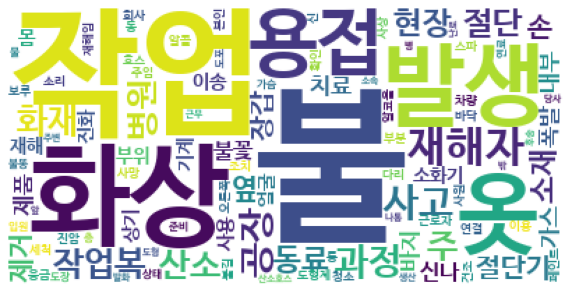

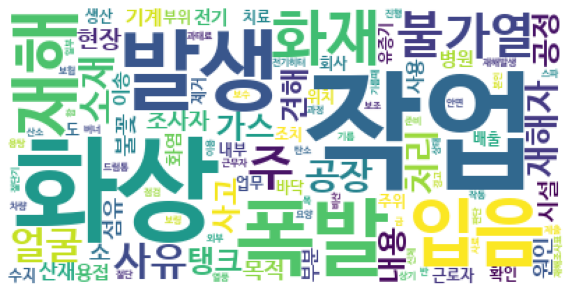

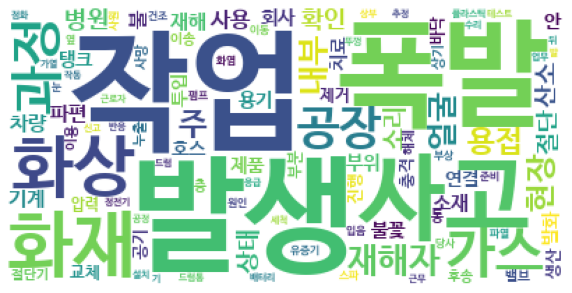

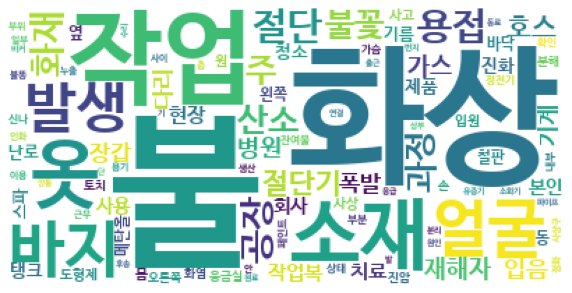

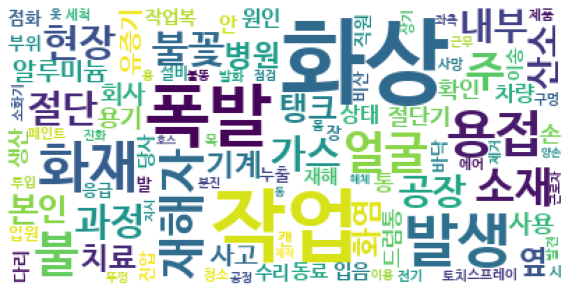

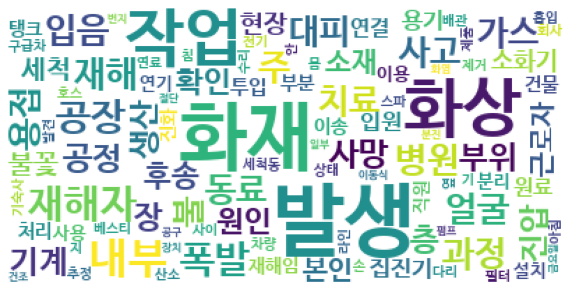

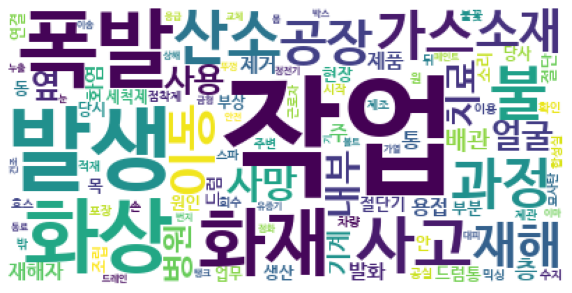

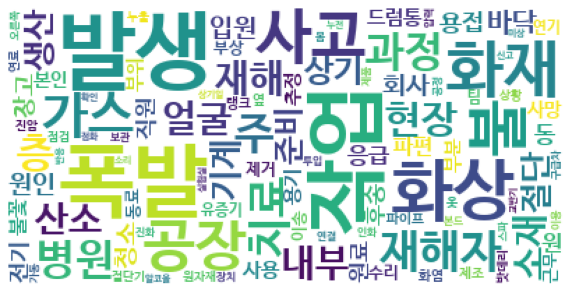

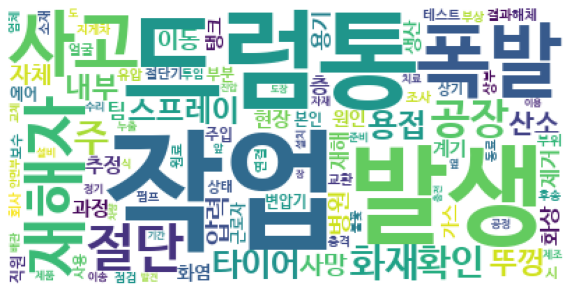

In [102]:
# countvector 의 각 cluster의 wordcloud
for index,keys in enumerate(df_cluster["cluster_label"]):
    temp_morphs_list = []
    for key in keys:
        sentence_index = df[df["연번"] == key].index[0]
        for i in sentence_nouns_list[sentence_index]:
            temp_morphs_list.append(i)
    nouns_counter = Counter(temp_morphs_list)
    top_nouns = dict(nouns_counter.most_common(100))
                         
    wc = WordCloud(background_color="white",
                   font_path='/Users/byeonghyeon/Documents/GitHub/IndustrialSystemsEngineering_Project/font/NanumBarunGothicBold.ttf')
    wc.generate_from_frequencies(top_nouns)
    print(top_nouns)
    # World
    # 많이 나타나는 단어일수록 크게 나타남

    figure = plt.figure()
    figure.set_size_inches(10, 10)
    ax = figure.add_subplot(1, 1, 1)
    ax.axis("off")
    ax.imshow(wc)
    wc.to_file(filename="WC_K-Means{}.png".format(index)) # to_file 함수
        

# Word2Vec

In [105]:
model = Word2Vec(sentences = sentence_nouns_list,
                 vector_size=800, # 차원 
                 window=5, # 훈련시 앞 뒤로 고려하는 단어의 개수
                 min_count=5, # 해당 빈도수 보다 작게 등장한 단어의 경우 모델 학습 배제
                 sg=1, # skip-gram
                 workers = 4, # 모델을 만들때 스레드 개수 
                 sample = 1e-3) # 전체 데이터에서 많이 등장하는 단어는 그만큼 학습 기회가 많으므로 이런 학습량을 확률적인 방식으로 줄이기 위한 변수
model.wv.vectors.shape
model.init_sims()

<ipython-input-105-8d13a66983a1>:9: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims()


In [106]:
word_embeddings = pd.DataFrame(model.wv.vectors[:, :], index=model.wv.index_to_key[:])
word_embeddings

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
작업,-0.082232,0.011789,0.101760,-0.002950,0.018382,0.021533,0.031814,0.026390,0.033876,-0.052606,...,0.042413,-0.065361,-0.081976,-0.012855,0.071883,0.057096,0.020674,-0.031719,0.063343,0.033043
화상,-0.130130,-0.099849,0.064700,-0.080658,0.048873,-0.109727,-0.045151,0.006989,0.062803,-0.048080,...,0.043362,-0.053143,-0.028963,0.005260,0.026911,0.079014,-0.039437,0.058518,0.058551,-0.006106
발생,-0.112997,-0.061622,0.060621,-0.089467,0.044683,-0.053946,-0.037350,0.004788,0.057783,-0.029197,...,0.021294,-0.045803,-0.057566,-0.049514,0.024618,0.077119,-0.015141,0.039725,0.071026,0.001260
불,-0.159124,-0.054371,0.068921,-0.086146,0.030959,-0.123519,-0.004667,0.015823,0.020966,-0.095939,...,0.054853,-0.015571,-0.053365,-0.002868,0.064896,0.035662,-0.025468,0.056485,0.055309,-0.002980
폭발,-0.088654,-0.039955,0.075622,-0.039785,0.036830,-0.017507,-0.013285,0.013694,0.062677,-0.036003,...,0.031682,-0.059736,-0.059850,-0.018215,0.043399,0.067799,-0.005189,0.014347,0.070252,0.010865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
페인트통,-0.073698,-0.036067,0.074543,-0.029664,0.032155,-0.017585,-0.009516,0.013831,0.046795,-0.026852,...,0.037577,-0.060814,-0.042792,-0.005732,0.035411,0.066773,-0.007838,0.000128,0.048682,0.013089
성심,-0.071255,-0.068232,0.077212,-0.032379,0.040162,-0.032701,-0.028975,0.013764,0.064999,-0.017801,...,0.044113,-0.081817,-0.021042,0.015124,0.021972,0.084577,-0.023507,0.003100,0.042500,0.008391
회수기,-0.078535,-0.037204,0.084452,-0.028466,0.034443,-0.013630,-0.007149,0.017203,0.055925,-0.027954,...,0.042989,-0.071214,-0.049465,-0.003972,0.039078,0.075732,-0.006709,-0.005196,0.053632,0.018229
수출,-0.071816,-0.034083,0.077399,-0.027207,0.033140,-0.012934,-0.010472,0.015474,0.050639,-0.026326,...,0.039231,-0.067015,-0.041684,-0.002188,0.036197,0.071040,-0.008039,-0.003451,0.047006,0.014785


In [107]:
# target과 가장 유사한 단어 뽑기 (결과가 잘 나오는것 을 알수 있음)
target = "화재"
print(model.wv.most_similar(target))

[('발생', 0.9914242625236511), ('진압', 0.9812524318695068), ('소화기', 0.9748860001564026), ('진화', 0.9609506130218506), ('입음', 0.94437575340271), ('사고', 0.9371258616447449), ('얼굴', 0.9229658246040344), ('추정', 0.9211165308952332), ('정전기', 0.9185255765914917), ('몸', 0.9176411032676697)]


In [108]:
tsne = TSNE(random_state=0,
            learning_rate = 50,
            n_components = 2 # 2차원
           )
tsne_points = tsne.fit_transform(word_embeddings.values)

In [109]:
tsne_df = pd.DataFrame(tsne_points, index=word_embeddings.index, columns=['x_coord', 'y_coord'])
tsne_df['word'] = tsne_df.index
tsne_df

,x_coord,y_coord,word
작업,43.311558,22.363501,작업
화상,15.981299,-28.331484,화상
발생,13.310649,-28.309443,발생
불,17.941679,-26.641901,불
폭발,41.369400,7.392652,폭발
...,...,...,...
페인트통,-36.991245,-5.207698,페인트통
성심,-6.930686,-33.004436,성심
회수기,7.650160,13.350129,회수기
수출,-33.457294,0.764824,수출


In [111]:
word_embeddings_transpose = word_embeddings.transpose()
word_embeddings_transpose # 전치 행렬
term_document_matrix = word_embeddings.dot(word_embeddings_transpose) # 행렬 * 전치행렬
term_document_matrix # 동시 단어 행렬


,작업,화상,발생,불,폭발,화재,사고,재해자,공장,용접,...,양다리,의사,붓,도어,농기계,페인트통,성심,회수기,수출,영업
작업,2.389408,1.208013,1.561880,1.665928,1.835138,1.468932,1.575675,1.767039,1.884165,2.154718,...,1.284303,1.458983,1.536669,1.545620,1.445629,1.509022,1.245825,1.737008,1.544365,1.354021
화상,1.208013,2.634605,2.154571,2.398468,1.756520,2.280693,1.992638,1.688126,1.397705,1.475431,...,1.291481,1.668574,1.539964,1.511905,1.416751,1.493642,1.778097,1.624376,1.498337,1.347911
발생,1.561880,2.154571,2.245672,2.130940,1.821029,2.331350,1.908291,1.732516,1.574984,1.707157,...,1.281367,1.564664,1.529951,1.510727,1.414973,1.498428,1.540205,1.642476,1.503371,1.341052
불,1.665928,2.398468,2.130940,2.671059,1.854566,2.184819,1.952254,1.734972,1.485935,1.889543,...,1.301655,1.566805,1.556137,1.521651,1.420984,1.519178,1.534876,1.658036,1.511623,1.348118
폭발,1.835138,1.756520,1.821029,1.854566,1.793560,1.820832,1.732258,1.709441,1.662625,1.802951,...,1.267306,1.527232,1.513558,1.509501,1.413624,1.479632,1.452746,1.665246,1.503587,1.332572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
페인트통,1.509022,1.493642,1.498428,1.519178,1.479632,1.513699,1.453308,1.450037,1.421543,1.473351,...,1.078055,1.318719,1.286663,1.285691,1.205132,1.255820,1.278278,1.414495,1.280050,1.135744
성심,1.245825,1.778097,1.540205,1.534876,1.452746,1.604958,1.535875,1.459777,1.374897,1.268948,...,1.106637,1.428249,1.318261,1.316962,1.236787,1.278278,1.486881,1.431956,1.307838,1.168790
회수기,1.737008,1.624376,1.642476,1.658036,1.665246,1.649283,1.616377,1.634466,1.620642,1.670264,...,1.214872,1.484106,1.449918,1.451402,1.360597,1.414495,1.431956,1.600414,1.445334,1.281315
수출,1.544365,1.498337,1.503371,1.511623,1.503587,1.516135,1.471300,1.478781,1.459126,1.494867,...,1.099775,1.348009,1.312443,1.313094,1.231077,1.280050,1.307838,1.445334,1.307822,1.159758


In [112]:
# 여기에 Word2Vec network 시각화 



# Word2Vec K-means Clustering, Wordcloud

In [113]:
tsne2 = TSNE(random_state=0,
             learning_rate = 50,
             n_components = 2)
tsne2_features = tsne2.fit_transform(word_embeddings)

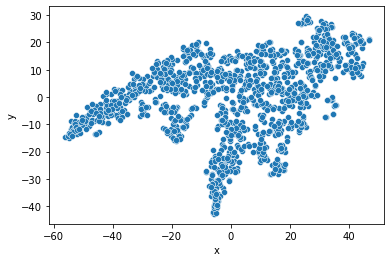

In [114]:
df_tsne2 = pd.DataFrame()
df_tsne2['x'] = tsne2_features[:,0]
df_tsne2['y'] = tsne2_features[:,1]
sns.scatterplot(x="x",y="y",data = df_tsne2)
plt.show()

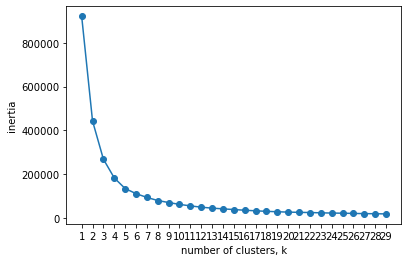

In [118]:
ks = range(1,30)

inertias = []

for k in ks:
    model2 = KMeans(n_clusters=k)
    model2.fit(tsne2_features)
    inertias.append(model2.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


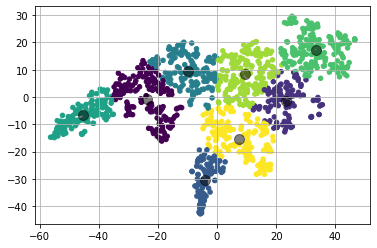

In [121]:
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

# 모델에 fitting 하기
kmeans.fit(tsne2_features)

y_kmeans = kmeans.predict(tsne2_features)
y_kmeans[0:10] # 군집화 된 결과

plt.scatter(np.array(tsne2_features)[:,0], np.array(tsne2_features)[:,1], c=y_kmeans, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.show()


In [122]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

clustered_dic = {}
clustered_list = []
cluster_num = len(set(y_kmeans))
k_means_cluster_label = {}
for idx,i in enumerate(y_kmeans):
    if i not in clustered_dic:
        clustered_dic[i] = [df['재해개요'].iloc[idx]]
    else:
        clustered_dic[i].append(df['재해개요'].iloc[idx])
    if i not in k_means_cluster_label:
        k_means_cluster_label[i] = [df["연번"].iloc[idx]]
    else:
        k_means_cluster_label[i].append(df["연번"].iloc[idx])
clustered_dic

k_means_cluster_label_list = []
for i in k_means_cluster_label.items():
    k_means_cluster_label_list.append(i[1])


# 클러스터링이 된 패키지들
# 20개의 군집으로 생성
clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])
clustered_dic
df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
cluster_num = [len(i) for i in df_cluster['clusters']]
df_cluster['cluster_num'] = cluster_num
df_cluster['cluster_label'] = k_means_cluster_label_list
df_cluster

,num,clusters,cluster_num,cluster_label
0,0,[합동폐차산업(주) 내 생산동 작업장에서 폐자동차(코란도)하체 해체 작업과정에서 연...,163,"[43, 478, 1388, 1525, 1973, 2545, 3112, 3588, ..."
1,1,[2011년 12월24일 16:00 10분 경 재해자 진장후가 당사 알루미늄 25톤...,111,"[120, 197, 394, 636, 672, 3294, 7286, 7306, 88..."
2,2,[실험실에서 살모넬라 분리 배양을 위해 BAS 배지를 삼각프라스크에 조제하여 Hot...,93,"[963, 25773, 27178, 29671, 32065, 34394, 38856..."
3,3,[소량 포장용 수동 포장기 세척공정 중 용제(Buthyl acetate)가 포장용기...,139,"[3420, 4276, 4892, 5940, 8527, 9084, 9138, 106..."
4,4,[2013년 06월 21일 16:00경 인천 연수구 옥련동 산2-12번지 소재의 S...,123,"[8273, 10759, 13071, 16036, 16705, 17104, 2452..."
5,5,[주조사업장내 가우징 작업장에서 롤초크 안쪽에 붙어있는 소착을 제거하기 위해서 가우...,175,"[15093, 19941, 44303, 44306, 49698, 64929, 664..."
6,6,[[비보고 사유] 이천만원 이하 공사인 관계로 산재처리 되지 않는다고 하여서 [조사...,163,"[56461, 59710, 60553, 68983, 76427, 104762, 10..."
7,7,[[비보고 사유] 가스주입실에서 이송대기중 질소가스통 체결부위 불량으로 폭발되면서 ...,151,"[133646, 147273, 148771, 158477, 162656, 16780..."


{'작업': 161, '화상': 96, '발생': 96, '불': 81, '폭발': 61, '화재': 58, '재해': 34, '가스': 33, '용접': 31, '과정': 31, '사고': 30, '재해자': 29, '공장': 27, '절단': 26, '내부': 24, '주': 23, '얼굴': 22, '기계': 20, '치료': 20, '산소': 20, '소재': 20, '탱크': 20, '불꽃': 19, '병원': 19, '현장': 19, '회사': 18, '가열': 18, '사용': 16, '입음': 16, '절단기': 16, '근로자': 15, '제거': 14, '사망': 14, '동료': 14, '원인': 14, '펌프': 14, '화염': 13, '전기': 13, '입원': 13, '작업복': 13, '이송': 13, '이용': 12, '옷': 12, '점화': 12, '청소': 12, '시설': 12, '내용': 11, '드럼통': 11, '옆': 11, '손': 11, '스파': 11, '공정': 11, '접착제': 11, '확인': 10, '페인트': 10, '부위': 10, '상기': 10, '층': 10, '생산': 10, '응급': 10, '당사': 10, '장갑': 10, '재해임': 10, '섬유': 10, '사유': 9, '상태': 9, '건조': 9, '호스': 9, '신나': 9, '후송': 9, '발화': 9, '난로': 9, '밸브': 9, '준비': 8, '동': 8, '안전': 8, '제품': 8, '뚜껑': 8, '물질': 8, '본인': 8, '소화기': 8, '직원': 8, '부분': 8, '모터': 8, '외부': 8, '배출': 8, '처리': 7, '소': 7, '락카': 7, '안': 7, '진행': 7, '교체': 7, '설치': 7, '장소': 7, '부상': 7, '조립': 7, '목': 7, '세척': 7, '도장': 7, '토치': 7}
{'작업': 144, '화상': 93, '발생': 88, '폭발

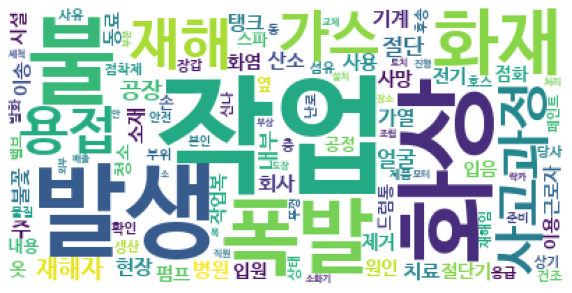

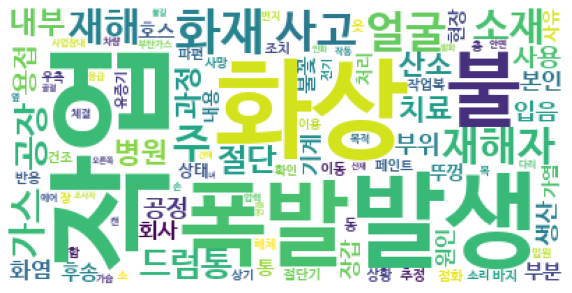

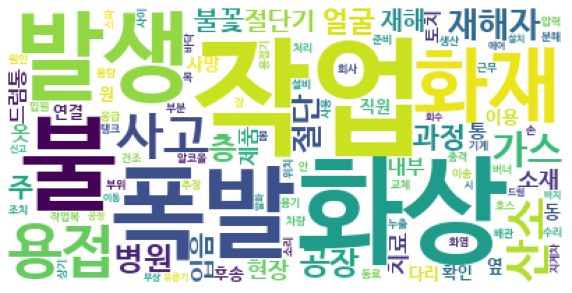

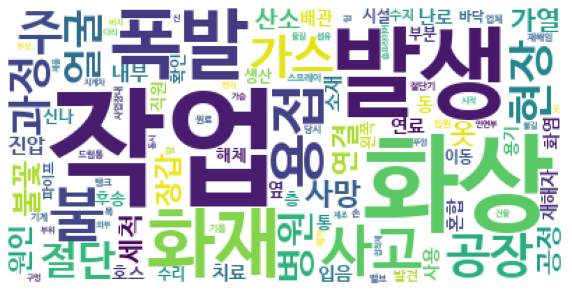

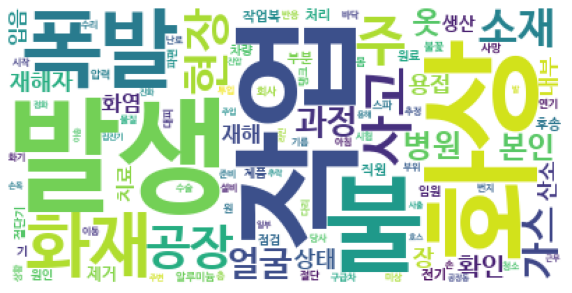

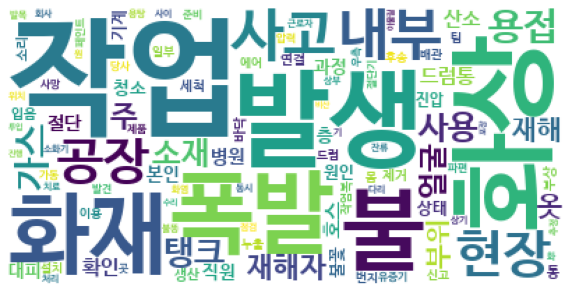

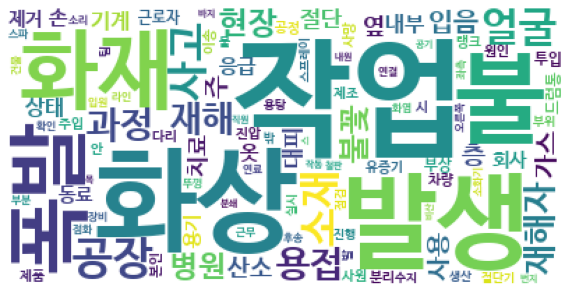

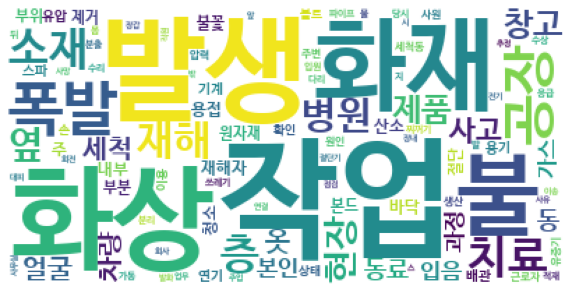

In [123]:
# countvector 의 각 cluster의 wordcloud
for index,keys in enumerate(df_cluster["cluster_label"]):
    temp_morphs_list = []
    for key in keys:
        sentence_index = df[df["연번"] == key].index[0]
        for i in sentence_nouns_list[sentence_index]:
            temp_morphs_list.append(i)
    nouns_counter = Counter(temp_morphs_list)
    top_nouns = dict(nouns_counter.most_common(100))
                         
    wc = WordCloud(background_color="white",
                   font_path='/Users/byeonghyeon/Documents/GitHub/IndustrialSystemsEngineering_Project/font/NanumBarunGothicBold.ttf')
    wc.generate_from_frequencies(top_nouns)
    print(top_nouns)
    # World
    # 많이 나타나는 단어일수록 크게 나타남

    figure = plt.figure()
    figure.set_size_inches(10, 10)
    ax = figure.add_subplot(1, 1, 1)
    ax.axis("off")
    ax.imshow(wc)
    wc.to_file(filename="WC_K-Means_Word2Vec{}.png".format(index)) # to_file 함수
        